In [ ]:
import tensorflow
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
base_path = "/content/drive/MyDrive/Driver Drowsiness Dataset (DDD)"
import os


✅ Loading from: /content/drive/MyDrive/Driver Drowsiness Dataset (DDD)/Drowsy


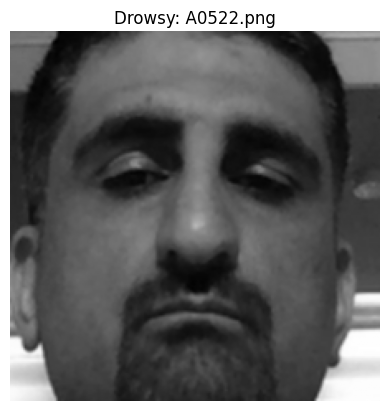

✅ Loading from: /content/drive/MyDrive/Driver Drowsiness Dataset (DDD)/Non Drowsy


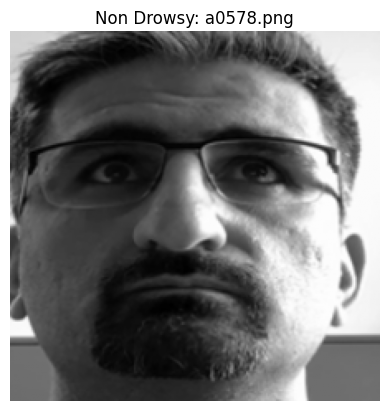

In [ ]:
base_path = "/content/drive/MyDrive/Driver Drowsiness Dataset (DDD)"
categories = ["Drowsy", "Non Drowsy"]

for category in categories:
    folder_path = os.path.join(base_path, category)

    if not os.path.exists(folder_path):
        print(f"❌ Folder not found: {folder_path}")
        continue

    print(f"✅ Loading from: {folder_path}")

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img_array is None:
            print(f"⚠️ Failed to load: {img_path}")
            continue

        resized_img = cv2.resize(img_array, (224, 224))
        plt.imshow(resized_img, cmap='gray')
        plt.title(f"{category}: {img_name}")
        plt.axis('off')
        plt.show()

        break  # remove this to show all images


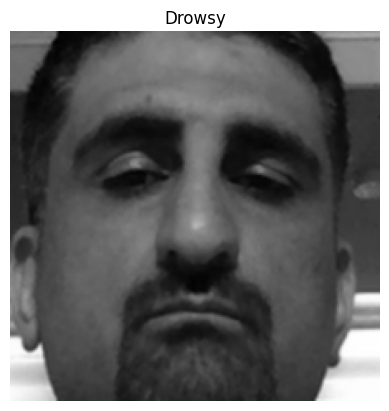

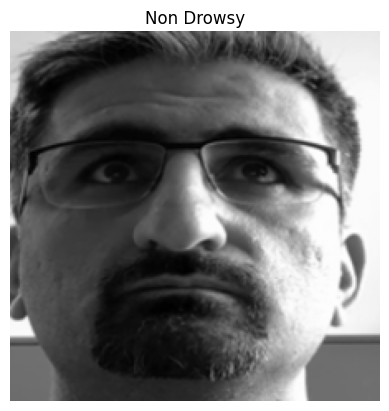

In [ ]:
# Set the dataset base path from your Google Drive
Datadirectory = "/content/drive/MyDrive/Driver Drowsiness Dataset (DDD)"
Classes = ["Drowsy", "Non Drowsy"]  # Class folders

# Loop through each class
for category in Classes:
    path = os.path.join(Datadirectory, category)  # Full path to class folder

    # Check if folder exists
    if not os.path.exists(path):
        print(f"❌ Path does not exist: {path}")
        continue

    # Loop through image files in the class folder
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img_array is None:
            print(f"⚠️ Couldn't load image: {img_path}")
            continue

        # Resize for consistency (optional)
        resized_img = cv2.resize(img_array, (224, 224))

        # Show image
        plt.imshow(resized_img, cmap='gray')
        plt.title(category)
        plt.axis('off')
        plt.show()

        break  # Show only the first image per class


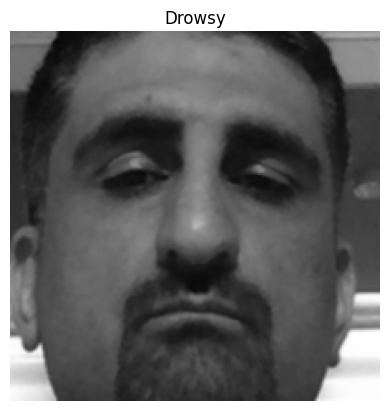

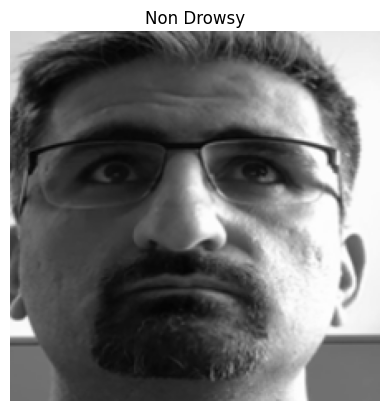

In [ ]:
img_size = 224  # Resize image to 224x224

for category in Classes:
    path = os.path.join(Datadirectory, category)

    if not os.path.exists(path):
        print(f"❌ Path not found: {path}")
        continue

    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img_array is None:
            print(f"⚠️ Could not read: {img_path}")
            continue

        # Convert grayscale to RGB (3-channel image)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)

        # Resize image to (224, 224)
        new_array = cv2.resize(backtorgb, (img_size, img_size))

        # Show the image
        plt.imshow(new_array, cmap="gray")
        plt.title(category)
        plt.axis('off')
        plt.show()

        break  # Show only one image per category


In [ ]:
## reading all the images and converting them into an array for data and labels

In [ ]:
Datadirectory = "/content/drive/MyDrive/Driver Drowsiness Dataset (DDD)"
Classes = ["Drowsy", "Non Drowsy"]

training_data = []

def create_training_data(Datadirectory, categories):
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)  # 0 for Drowsy, 1 for Non Drowsy

        for img in os.listdir(path):
            try:
                img_array = os.path.join(path, img)

                # Read image in grayscale
                img = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                if img is None:
                    continue  # skip if unreadable

                # Convert to RGB and resize
                img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                img_resized = cv2.resize(img_rgb, (img_size, img_size))

                training_data.append([img_resized, class_num])
            except Exception as e:
                pass  # You can print(e) if debugging

    return training_data

In [ ]:
create_training_data(Datadirectory, categories)

[[array([[[113, 113, 113],
          [113, 113, 113],
          [113, 113, 113],
          ...,
          [155, 155, 155],
          [155, 155, 155],
          [155, 155, 155]],
  
         [[117, 117, 117],
          [117, 117, 117],
          [117, 117, 117],
          ...,
          [165, 165, 165],
          [165, 165, 165],
          [165, 165, 165]],
  
         [[119, 119, 119],
          [119, 119, 119],
          [119, 119, 119],
          ...,
          [167, 167, 167],
          [166, 166, 166],
          [166, 166, 166]],
  
         ...,
  
         [[249, 249, 249],
          [249, 249, 249],
          [249, 249, 249],
          ...,
          [253, 253, 253],
          [253, 253, 253],
          [253, 253, 253]],
  
         [[249, 249, 249],
          [248, 248, 248],
          [247, 247, 247],
          ...,
          [253, 253, 253],
          [253, 253, 253],
          [253, 253, 253]],
  
         [[248, 248, 248],
          [247, 247, 247],
          [246, 246, 246

In [ ]:
print(len(training_data))

19359


In [ ]:
import random
random.shuffle(training_data)

In [ ]:
x = []
y = []

for features, label in training_data:
  x.append(features)
  y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3)


In [ ]:
x.shape

(19359, 224, 224, 3)

In [ ]:
#did not normalize it now, facing issues out of ram

In [ ]:
y = np.array(y)

In [ ]:
import pickle

pickle_out = open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("x.pickle", "rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [ ]:
!pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 574.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have ten

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


## deep learning model for training - transfer learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

Transfer Learning

In [ ]:
base_input = model.input
base_output = model.layers[-4].output

In [ ]:
Flat_layers = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layers)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

setting for binary classification

In [ ]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
new_model.fit(x, y, epochs = 1, validation_split = 0.1)

203/545 ━━━━━━━━━━━━━━━━━━━━ 36:45 6s/step - accuracy: 0.9480 - loss: 0.1329

KeyboardInterrupt: 

In [ ]:
new_model.save('my_model.h5')

In [ ]:
new_model = tf.keras.models.load_model('my_model.h5')

### **Check the network for predictions**

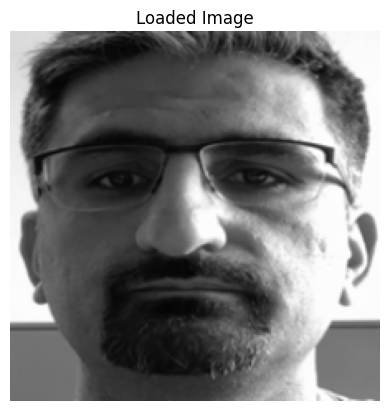

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Set the correct full path to the image
img_path = "/content/drive/MyDrive/Driver Drowsiness Dataset (DDD)/Non Drowsy/a0003.png"

# Read image in grayscale
img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded successfully
if img_array is None:
    print("❌ Failed to load image. Check the path and filename again.")
else:
    # Convert grayscale to RGB
    backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)

    # Resize image
    img_size = 224  # or whatever size you're using
    new_array = cv2.resize(backtorgb, (img_size, img_size))

    # Display image
    plt.imshow(new_array)
    plt.title("Loaded Image")
    plt.axis('off')
    plt.show()


In [ ]:
X_input = np.array(new_array).reshape(1, img_size , img_size , 3)

In [ ]:
X_input.shape

(1, 224, 224, 3)

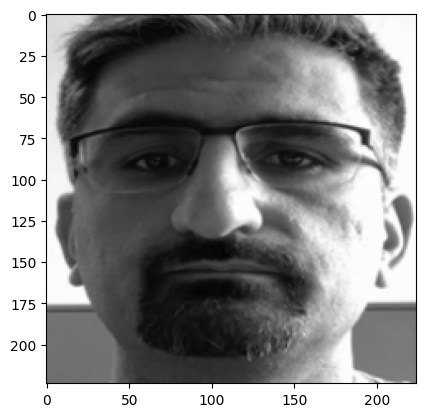

In [ ]:
plt.imshow(new_array)

In [ ]:
X_input = X_input/255.0


In [ ]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


In [ ]:
prediction

array([[0.00083752]], dtype=float32)

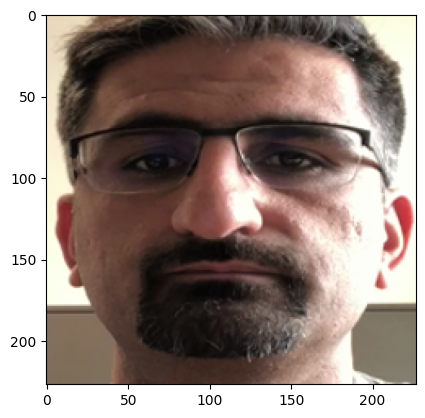

In [ ]:
img_path = "/content/drive/MyDrive/Driver Drowsiness Dataset (DDD)/Non Drowsy/a0003.png"

# Step 2: Load the image
img = cv2.imread(img_path)

# Step 3: Check if image is loaded
if img is None:
    print("❌ Image not found. Please check the path or filename.")
else:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [ ]:
import cv2

# Load the face cascade
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Check if it loaded correctly
if faceCascade.empty():
    print("❌ Haar cascade NOT loaded properly!")
else:
    print("✅ Haar cascade loaded successfully!")


✅ Haar cascade loaded successfully!


In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
eye_cacade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcacades_eye.xml')

✅ Image loaded successfully.


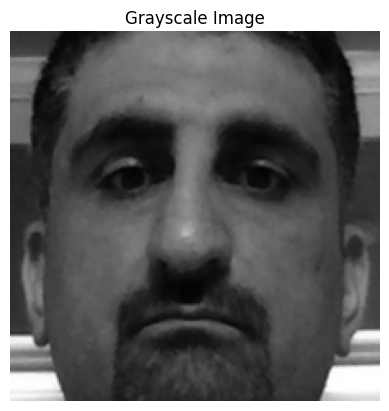

In [ ]:
image_path = "/content/drive/MyDrive/Driver Drowsiness Dataset (DDD)/Drowsy/A0012.png"
img = cv2.imread(image_path)

if img is None:
    print("❌ Image not loaded! Check the filename carefully.")
else:
    print("✅ Image loaded successfully.")
    # Convert to gray and show
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.axis("off")
    plt.title("Grayscale Image")
    plt.show()


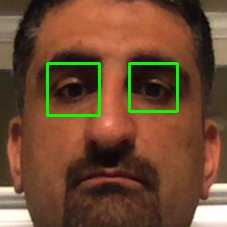

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

# Load the image
image_path = "/content/drive/MyDrive/Driver Drowsiness Dataset (DDD)/Drowsy/A0012.png"
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
    print("Error: Image not found. Please check the file path.")
else:
    # Load the pre-trained cascade classifiers
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Detect eyes within the detected faces
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]  # Region of interest (face)
        eyes = eye_cascade.detectMultiScale(roi_gray)

        # Draw rectangles around the eyes
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(img, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (0, 255, 0), 2)

    # Show the output image using cv2_imshow
    cv2_imshow(img)



## **Cropping the eye image**

eyes are not detected


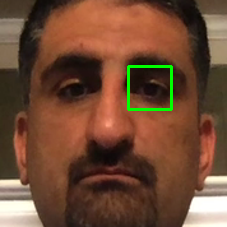

In [ ]:

import cv2
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the image
image_path = "/content/drive/MyDrive/Driver Drowsiness Dataset (DDD)/Drowsy/A0004.png"
img = cv2.imread(image_path)

eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    eyess = eye_cascade.detectMultiScale(roi_gray)  # same cascade on cropped region

    if len(eyess) != 0:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]  # Crop the eye region
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    else:
        print('eyes are not detected')

cv2_imshow(img)


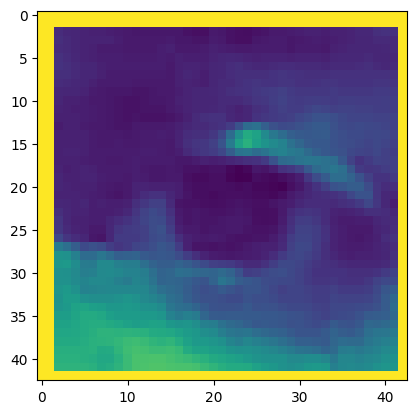

In [ ]:
plt.imshow(cv2.cvtColor(eyes_roi , cv2.COLOR_BGR2GRAY))

In [ ]:
eyes_roi.shape

(43, 43, 3)

In [ ]:
final_image=cv2.resize(eyes_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [ ]:
final_image.shape


(1, 224, 224, 3)

In [ ]:
new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[0.0007717]], dtype=float32)

<IPython.core.display.Javascript object>

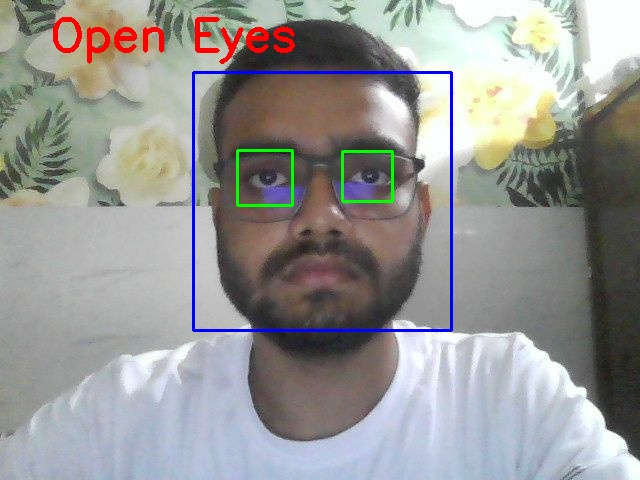

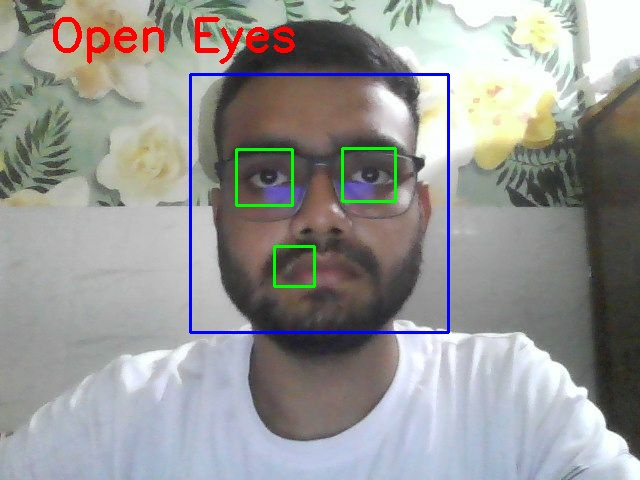

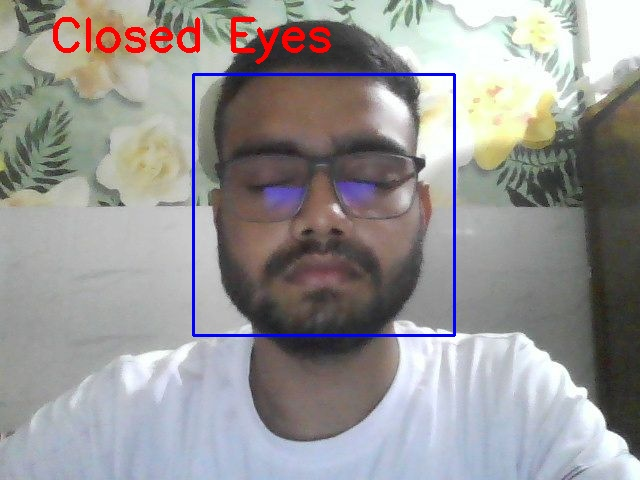

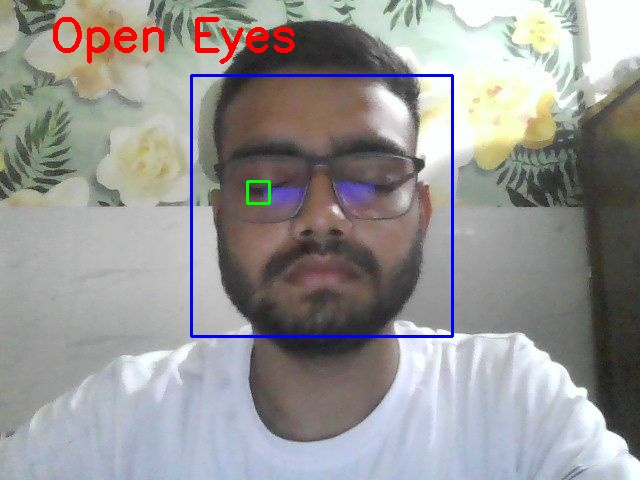

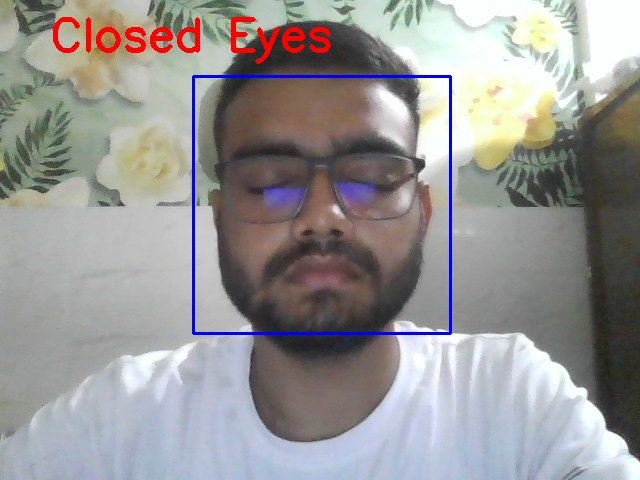

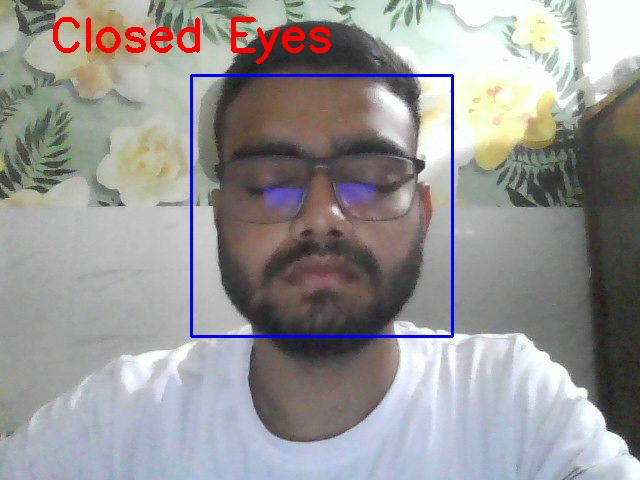

In [ ]:
# Install OpenCV and import essentials
!pip install opencv-python
from IPython.display import display, Javascript
from google.colab.output import eval_js
from IPython.display import Image
import cv2
import numpy as np
import PIL.Image
import io
import base64
import time

# JavaScript code to capture image
js = Javascript('''
async function takePhotoSequence(quality, count, delay) {
  const div = document.createElement('div');
  const video = document.createElement('video');
  div.appendChild(video);
  document.body.appendChild(div);

  const stream = await navigator.mediaDevices.getUserMedia({ video: true });
  video.srcObject = stream;
  await video.play();

  google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

  let results = [];

  for (let i = 0; i < count; i++) {
    await new Promise(resolve => setTimeout(resolve, delay)); // delay between captures
    const canvas = document.createElement('canvas');
    canvas.width = video.videoWidth;
    canvas.height = video.videoHeight;
    canvas.getContext('2d').drawImage(video, 0, 0);
    results.push(canvas.toDataURL('image/jpeg', quality));
  }

  stream.getTracks().forEach(track => track.stop());
  div.remove();

  return results;
}
''')

display(js)

# Function to trigger JS capture and save images
def take_multiple_photos(count=6, delay=1000, quality=0.8):
    js_call = f'takePhotoSequence({quality}, {count}, {delay})'
    data_list = eval_js(js_call)

    filenames = []
    for i, data in enumerate(data_list):
        binary = base64.b64decode(data.split(',')[1])
        filename = f'photo_{i+1}.jpg'
        with open(filename, 'wb') as f:
            f.write(binary)
        filenames.append(filename)
    return filenames

# Capture 6 frames
image_paths = take_multiple_photos(count=6, delay=1000)

# Load Haar cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Process and display each image
for path in image_paths:
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    status = "Eyes Not Detected"

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

        status = "Open Eyes" if len(eyes) > 0 else "Closed Eyes"

    cv2.putText(img, status, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 3)

    _, im_arr = cv2.imencode('.jpg', img)
    im_bytes = im_arr.tobytes()
    display(Image(data=im_bytes))


In [ ]:
!pip install playsound


  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=bb03281a2d5d5cb4a379f9b80c27476d8b0fc5aebb446eab65872a83804dfa7f
  Stored in directory: /root/.cache/pip/wheels/50/98/42/62753a9e1fb97579a0ce2f84f7db4c21c09d03bb2091e6cef4
Successfully built playsound


In [ ]:
!pip install opencv-python opencv-contrib-python numpy


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload a file


Saving ganne_ka_juice.mp3 to ganne_ka_juice.mp3


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the audio file


Saving ganne_ka_juice.mp3 to ganne_ka_juice (1).mp3


In [ ]:
from IPython.display import Audio

# Function to play the alert sound
def play_alert_sound():
    audio_path = '/content/ganne_ka_juice.mp3'  # Path to the uploaded file in Colab
    display(Audio(audio_path, autoplay=True))  # Play the sound


<IPython.core.display.Javascript object>

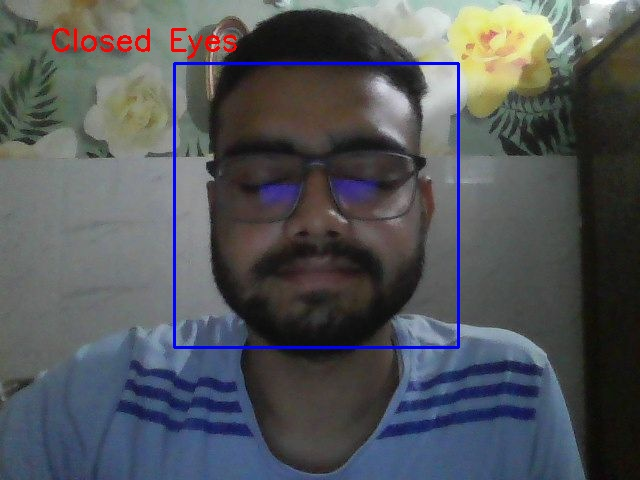

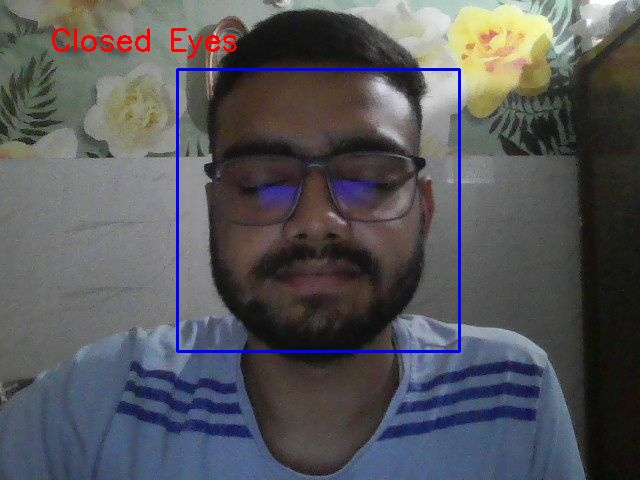

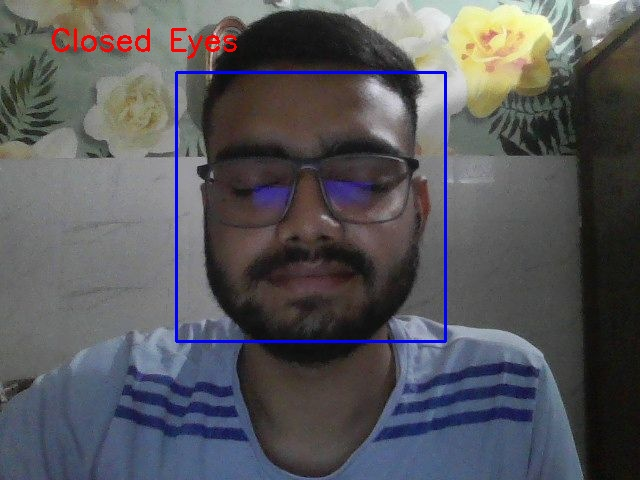

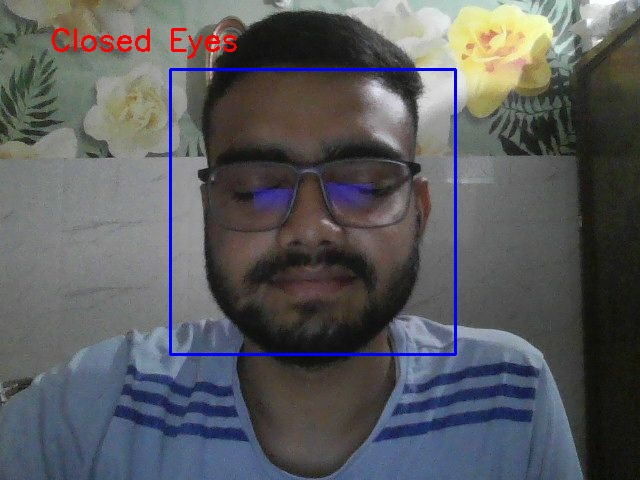

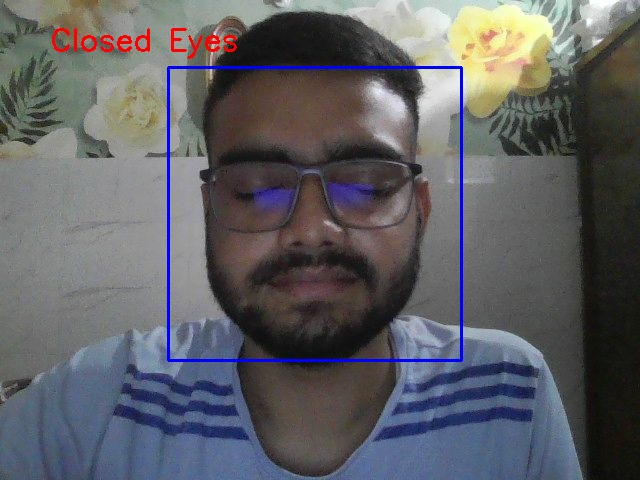

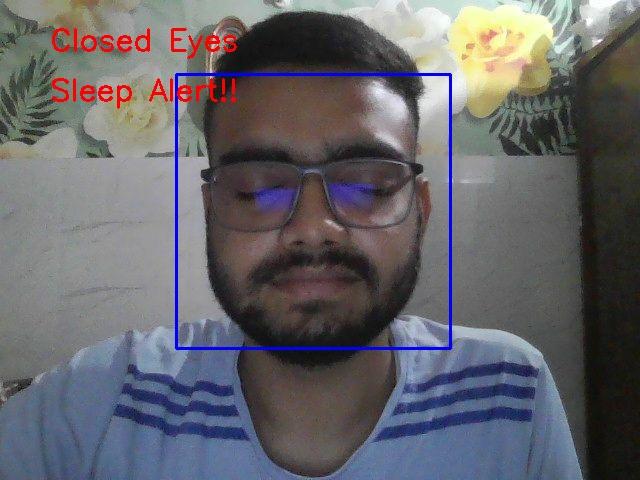

In [ ]:
# Install necessary libraries
!pip install opencv-python opencv-contrib-python

from IPython.display import display, Javascript, Audio
from google.colab.output import eval_js
import cv2
import numpy as np
import base64

# JavaScript code to capture image
js = Javascript('''
async function takePhotoSequence(quality, count, delay) {
  const div = document.createElement('div');
  const video = document.createElement('video');
  div.appendChild(video);
  document.body.appendChild(div);

  const stream = await navigator.mediaDevices.getUserMedia({ video: true });
  video.srcObject = stream;
  await video.play();

  google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

  let results = [];

  for (let i = 0; i < count; i++) {
    await new Promise(resolve => setTimeout(resolve, delay)); // delay between captures
    const canvas = document.createElement('canvas');
    canvas.width = video.videoWidth;
    canvas.height = video.videoHeight;
    canvas.getContext('2d').drawImage(video, 0, 0);
    results.push(canvas.toDataURL('image/jpeg', quality));
  }

  stream.getTracks().forEach(track => track.stop());
  div.remove();

  return results;
}
''')

display(js)

# Function to trigger JS capture and save images
def take_multiple_photos(count=6, delay=1000, quality=0.8):
    js_call = f'takePhotoSequence({quality}, {count}, {delay})'
    data_list = eval_js(js_call)

    filenames = []
    for i, data in enumerate(data_list):
        binary = base64.b64decode(data.split(',')[1])
        filename = f'photo_{i+1}.jpg'
        with open(filename, 'wb') as f:
            f.write(binary)
        filenames.append(filename)
    return filenames

# Capture 6 frames
image_paths = take_multiple_photos(count=6, delay=1000)

# Load Haar cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

# Set the alarm parameters
counter = 0

# Function to play the alert sound
def play_alert_sound():
    audio_path = '/content/ganne_ka_juice.mp3'  # Path to the uploaded file in Colab
    display(Audio(audio_path, autoplay=True))  # Play the sound

# Process and display each image
for path in image_paths:
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces and eyes
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    status = "Eyes Not Detected"

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

        status = "Open Eyes" if len(eyes) > 0 else "Closed Eyes"

    # Display the status on the frame
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, status, (50, 50), font, 1, (0, 0, 255), 2, cv2.LINE_4)

    # Sleep detection and alert
    if status == "Closed Eyes":
        counter += 1
        if counter > 5:  # Trigger after 5 consecutive closed-eye frames
            cv2.putText(img, 'Sleep Alert!!', (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            play_alert_sound()  # Play alert sound when sleep is detected
            counter = 0  # Reset the counter after alert
    else:
        counter = 0

    # Convert image to display
    _, im_arr = cv2.imencode('.jpg', img)
    im_bytes = im_arr.tobytes()
    display(Image(data=im_bytes))
